# Adaline Classifier Example
## Setup
First, we import modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


from matplotlib.colors import ListedColormap
from classifiers.adaline import AdalineGD, AdalineSGD
from functions.plotting import plot_decision_regions

Pull in data and save to a dataframe.

In [2]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

try:
    df = pd.read_csv(s, header=None, encoding='utf-8')
except:
    df = pd.read_csv("../data/iris-dataset.csv")

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Adjust data to create a label vector, and a matrix for the training data.

In [3]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100,[0,2]].values

Plot data

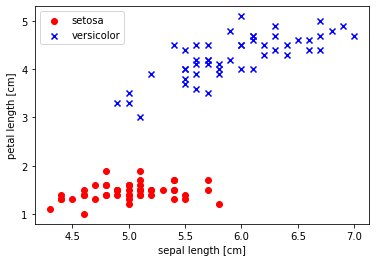

In [4]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Gradient Decent
In this section, we use build an Adaline classifer using gradient decent. The main feature of this classifer when compared to a Perceptron is that we use a linear activation function to determine of the prediction is correct. The gradient decent is method of updating the weights after each test.

We start here with building the model right at the begining.

In [5]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

We first show that the learning rate for this method is actually very difficult to get right without further modification. This is exemplified in the graphs below by showing the cost function value as we try to learn. The first learning rate ($\eta=0.01$) is too large, and cannot actually converge to a stable value. The second learning rate ($\eta=0.0001$) converges much too slow, as we see the cost function only drops by a value of 10 over the course of ten epochs.

Text(0.5, 1.0, 'Adaline - Learning Rate 0.0001')

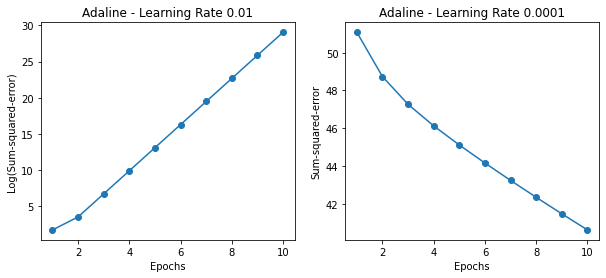

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning Rate 0.0001')

So instead, we implement a method of standardization called "feature scaling." This is done by subtracting off the mean and scaling the feature by the standard deviation.

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Using t his method, we quickly can converge using a much larger learning rate $\eta$.

In [8]:
ada_std = AdalineGD(n_iter=15, eta=0.01)
ada_std.fit(X_std, y)

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


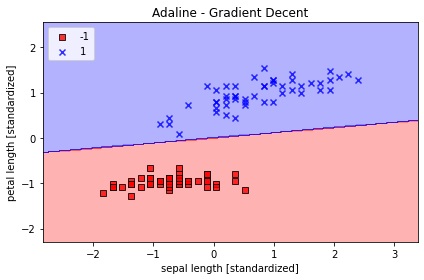

In [9]:

plot_decision_regions(X_std, y, classifier=ada_std)
plt.title('Adaline - Gradient Decent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Stocastic Gradient Decent
With the previous model, we updated the weights after running through *all* of the training examples. This process is sometimes refered to as a batch gradient decent. Mathematically, the difference is that we update the entire weights vector with the accumulated error over all the training examples

$$ \Delta\pmb w = \eta \sum_i \left( y^{(i)} - \phi\left(z^{(i)}\right)\pmb x ^{(i)} \right)$$

With the Stocastic Gradient Decent, we will update the weights after every training example, which is just a single term in the above equation.

In [10]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

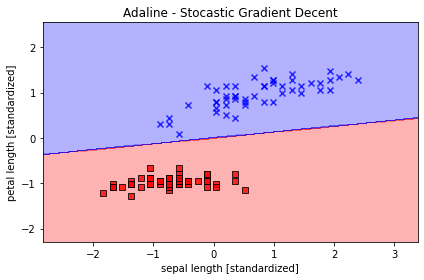

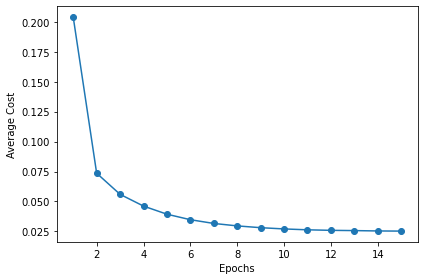

In [11]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stocastic Gradient Decent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()


# Do it all in SciKit-Learn

We train the model using the perceptron classifier from scikit learn

In [12]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(feature_train_std, label_train)

NameError: name 'feature_train_std' is not defined

We can now predict on the test set to make sure that out model looks good.


In [ ]:
label_prediction = ppn.predict(feature_test_std)
print(f'Misclasified examples: {(label_prediction != label_test).sum()}')
print(f'Error: {(label_prediction != label_test).sum()/len(label_test):.4f}')
print(f'Accuracy (metrics): \t{accuracy_score(label_test, label_prediction):.4f}')
print(f'Accuracy (perceptron): \t{ppn.score(feature_test_std, label_test):.4f}')

We can now plot a graph to show the regions that each label corresponds to. This will also mark the items that were part of the test set. This should allow us to visually note which ones are in the correct region and which ones are not.


In [ ]:
features_combined_std = np.vstack((feature_train_std, feature_test_std))
label_combined = np.hstack((label_train, label_test))
plot_decision_regions(X=features_combined_std,
                      y=label_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
